In [18]:
# !pip install category_encoders
# !pip install pycaret[full]

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from pycaret.classification import load_model, predict_model
from sklearn.metrics import classification_report, confusion_matrix

import os
import warnings
warnings.filterwarnings('ignore')


# Set paths
BASE_DIR = '/content'
MODEL_PATH = os.path.join(BASE_DIR, "no_SMOTE_model_optimal_weights")
INPUT_CSV_PATH = os.path.join(BASE_DIR, "b_test.csv")  # Path to your unseen test data

In [20]:

# Load the saved model
model = load_model(MODEL_PATH)


Transformation Pipeline and Model Successfully Loaded


In [21]:

# Load unseen data
input_df = pd.read_csv(INPUT_CSV_PATH)


   prediction_label  prediction_score
0                 0            1.0000
1                 0            1.0000
2                 0            1.0000
3                 0            0.9998
4                 0            0.9998

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    124633
           1       0.92      0.68      0.78      6123

    accuracy                           0.98    130756
   macro avg       0.95      0.84      0.89    130756
weighted avg       0.98      0.98      0.98    130756



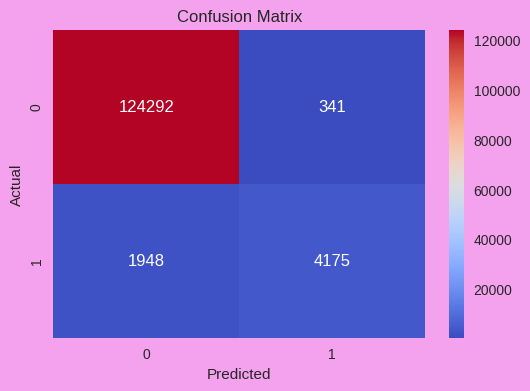

<Figure size 1000x600 with 0 Axes>

In [22]:


# ===== Preprocessing (Same as Training Phase) =====

# Encode low-cardinality categorical features
categorical_cols = ['stand', 'p_throws', 'inning_topbot', 'if_fielding_alignment', 'of_fielding_alignment']
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(input_df[col].astype(str))
    input_df[col] = le.transform(input_df[col].astype(str))

# Target encoding for high-cardinality features (use dummy target values temporarily)
te = TargetEncoder(cols=['home_team', 'pitch_type'])
# Use dummy values for fitting because real target isn't available
dummy_target = np.zeros(len(input_df))
input_df = te.fit_transform(input_df, dummy_target)

# Convert boolean columns to int
for col in ['on_3b', 'on_2b', 'on_1b']:
    input_df[col] = input_df[col].astype(int)

# ===== Prediction =====
predictions = predict_model(model, data=input_df)

# Display first few predictions
print(predictions[['prediction_label', 'prediction_score']].head())

# ===== Performance Metrics (If actual values are available) =====
if 'is_hr' in input_df.columns:
    print("\nClassification Report:")
    print(classification_report(input_df['is_hr'], predictions['prediction_label']))

    # Confusion Matrix
    cm = confusion_matrix(input_df['is_hr'], predictions['prediction_label'])
    plt.figure(figsize=(6,4), facecolor="#f5a2ee")
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
else:
    print("Note: Actual target values ('is_hr') not present in input.csv. Skipping performance metrics.")

# ===== Covariance Matrix of Input Features =====
plt.figure(figsize=(10, 6), facecolor="#f5a2ee")
plt.show()
